# Data Wrangling Project: WeRateDogs Twitter 
### Table of Contents
<ol>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#tidiness">A. Data Cleaning - Tidiness</a></li>
<li><a href='#quality'>B. Data Cleaning - Quality</a></li>
<li><a href="#storing">Data Storing</a></li>
<li><a href="#analyze">Analyze</a></li>
<li><a href="#reference">References</a></li>

</ol>

#### <a id='gathering'></a>
## 1. Data Gathering

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import tweepy
import json
import time
import datetime
import matplotlib.pyplot as plt

In [2]:
# Given file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [4]:
print(end-start)

1928.179499646


In [5]:
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

In [6]:
# download tweet 'image-predictions.tsv' file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
# import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
tweet_id = []
favorites = []
retweets = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            tweet_id.append(tweet_data['id'])
            favorites.append(tweet_data['favorite_count'])
            retweets.append(tweet_data['retweet_count'])
            
tweet_info = pd.DataFrame({'tweet_id':tweet_id, 
                           'favorite_count':favorites, 
                           'retweet_count':retweets})

In [9]:
tweet_info.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37454,8148
1,892177421306343426,32189,6034


In [10]:
img_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [11]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [12]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 3 columns):
tweet_id          2335 non-null int64
favorite_count    2335 non-null int64
retweet_count     2335 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [13]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
tweet_info.describe()

,tweet_id,favorite_count,retweet_count
count,2.335000e+03,2335.000000,2335.000000
mean,7.419847e+17,7812.244968,2860.120343
std,6.820978e+16,12114.507495,4839.565479
min,6.660209e+17,0.000000,1.000000
25%,6.783065e+17,1359.000000,575.500000
50%,7.184600e+17,3401.000000,1338.000000
75%,7.986692e+17,9577.500000,3338.000000
max,8.924206e+17,161745.000000,82156.000000


In [16]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# we can see many people still rate dogs less than 10.. but they are all good dogs
twitter_archive[twitter_archive['rating_numerator']<10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [19]:
# Unlike rating numerator, 'rating_denominator == 10' has to be one of our default settings. We will deal with this later.
twitter_archive[twitter_archive['rating_denominator']!=10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

#### <a id='assessing'></a>
## 2. Data Assessing

#### Tidiness
1. 'doggo', 'floofer', 'pupper', 'puppo' are values, not variables.
2. Those three DataFrames can be merged into one.

#### Quality

1. Many tweets without images
2. Remove retweets & reply since we only want original ratings
3. Some dogs names are incorrect (even though it can be anything..!)
4. There are many missing values in 'name' column and dog stages
5. Make 'source' column more readable.
6. Remove columns that will not be used for analysis
7. Delete tweets without ratings.
8. We need to change wrong datatypes (date, tweet_id)

#### <a id='tidiness'></a>
## 3-A. Data Cleaning - Tidiness

In [20]:
# Create copies of original DataFrames to work off of
archive_clean = twitter_archive.copy()
img_clean = img_df.copy()
tweet_info_clean = tweet_info.copy()

**Define**

1. I will create 'stage' column that contains those values 'doggo', 'floofer', 'pupper', 'puppo'

**Code**

In [21]:
archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

archive_clean['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
archive_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
archive_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
archive_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
archive_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [22]:
archive_clean['dog_stage'].value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [23]:
#replace those rows with more than 2 stages
archive_clean['dog_stage'].replace("doggoNonepupperNone","doggo,pupper", inplace=True)
archive_clean['dog_stage'].replace("doggoflooferNoneNone","doggo,floofer", inplace=True)
archive_clean['dog_stage'].replace("doggoNoneNonepuppo","doggo,puppo", inplace=True)

**Test**

In [24]:
archive_clean['dog_stage'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [25]:
archive_clean.sample(10)
#archive_clean.query("dog_stage == 'doggo,floofer'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1455,695409464418041856,NaN,NaN,2016-02-05 00:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He just got back from his job int...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695409464...,10,10,Bob,None,None,None,None,None
1424,697990423684476929,NaN,NaN,2016-02-12 03:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,11,10,Doug,None,None,None,None,None
1625,684830982659280897,NaN,NaN,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This little fella really hates stairs. Prefers...,NaN,NaN,NaN,https://vine.co/v/eEZXZI1rqxX,13,10,None,None,None,pupper,None,pupper
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,None,None,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None,pupper
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None,pupper
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None,None
2229,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,None,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None,None


**Define**

2. Those three DataFrames can be merged into one.

**Code**

In [26]:
archive_merged = pd.merge(archive_clean, img_clean, on='tweet_id', how='inner')
archive_merged = pd.merge(archive_merged, tweet_info_clean, on='tweet_id', how='inner')

archive_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

**Test**

In [27]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2062
Data columns (total 31 columns):
tweet_id                      2063 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2063 non-null object
source                        2063 non-null object
text                          2063 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2063 non-null object
rating_numerator              2063 non-null int64
rating_denominator            2063 non-null int64
name                          2063 non-null object
doggo                         2063 non-null object
floofer                       2063 non-null object
pupper                        2063 non-null object
puppo                         2063 non-null object
dog_stage                     2063 

#### <a id='quality'></a>
## 3-B. Data Cleaning - Quality

1. Many tweets without images
2. Remove retweets & reply since we only want original ratings
3. Some dogs names are incorrect (even though it can be anything..!)
4. There are many missing values in 'name' column and dog stages
5. Make 'source' column more readable.
6. Remove columns that will not be used for analysis
7. Delete tweets without ratings.
8. We need to change wrong datatypes (date, tweet_id, in_reply_to_ststus_id, in_reply_to_user_id)

**Define**

1. We want to delete those tweets without images because we only want tweets with images

**Code**

In [28]:
archive_merged = archive_merged.dropna(subset = ['expanded_urls'])

**Test**

In [29]:
sum(archive_merged['expanded_urls'].isnull())

0

**Define**

2. Remove retweets since we only want original ratings

**Code**

In [30]:
#  update dataframe where 'retweeted_status_id' is null
archive_merged = archive_merged[archive_merged['retweeted_status_id'].isnull()]
archive_merged = archive_merged[archive_merged['in_reply_to_user_id'].isnull()]

**Test**

In [31]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2062
Data columns (total 31 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null object
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1966 non-null object
doggo                         1966 non-null object
floofer                       1966 non-null object
pupper                        1966 non-null object
puppo                         1966 non-null object
dog_stage                     1966 non-n

**Define**

3. Some dogs names are incorrect (even though it can be anything..!)

**Code**

In [32]:
archive_merged['name'].value_counts()

None        524
a            55
Lucy         10
Cooper       10
Oliver       10
Charlie      10
Penny         9
Tucker        9
Winston       8
Sadie         8
the           7
Toby          7
Lola          7
Daisy         7
Stanley       6
an            6
Bo            6
Jax           6
Koda          6
Bella         6
Milo          5
Bailey        5
Oscar         5
Chester       5
Buddy         5
Scout         5
Rusty         5
Dave          5
Leo           5
Louis         5
           ... 
Freddery      1
Monty         1
Chevy         1
Kona          1
Taz           1
Covach        1
Carly         1
Monster       1
Vixen         1
Kingsley      1
Kirk          1
space         1
Reptar        1
Bluebert      1
Molly         1
Ester         1
Baron         1
Gordon        1
Carll         1
Snoop         1
Jennifur      1
Ed            1
Kayla         1
Akumi         1
Margo         1
Jett          1
Loomis        1
Fido          1
Lilly         1
Kulet         1
Name: name, Length: 933,

In [33]:
archive_merged['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Ho

In [34]:
#find wrong names visually
wrong_names = ['an', 'all', 'not', 'the', 'a', 'incredibly', 'infuriating', 'just', 'this', 'my', 'actually', 'mad', 'such', 'his', 'getting']
archive_merged['name'].replace(wrong_names, 'None', inplace=True)

**Test**

In [35]:
# see number of 'None' has been increased and I can't visually find any odd-sounding name at least.
archive_merged['name'].value_counts()

None        606
Charlie      10
Cooper       10
Oliver       10
Lucy         10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          7
Daisy         7
Toby          7
Bo            6
Stanley       6
Koda          6
Bella         6
Jax           6
Oscar         5
Chester       5
Louis         5
Bailey        5
Leo           5
Rusty         5
Milo          5
Scout         5
Buddy         5
Dave          5
Jack          4
Cassie        4
Finn          4
           ... 
Lucky         1
Mya           1
Monkey        1
Freddery      1
Monty         1
Covach        1
Monster       1
Lilly         1
Gordon        1
Vixen         1
Kingsley      1
Kirk          1
space         1
Reptar        1
Bluebert      1
Molly         1
Ester         1
Baron         1
Carll         1
Fido          1
Snoop         1
Jennifur      1
Ed            1
Timber        1
Kayla         1
Akumi         1
Margo         1
Jett          1
Loomis        1
Kulet         1
Name: name, Length: 919,

**Define**

4. There are many missing values in 'name' column and dog stages

**Code**

In [36]:
archive_merged['name'] = archive_merged['name'].replace('None', np.NaN)
archive_merged['dog_stage'] = archive_merged['dog_stage'].replace('None', np.NaN)

**Test**

In [37]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2062
Data columns (total 31 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null object
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1360 non-null object
doggo                         1966 non-null object
floofer                       1966 non-null object
pupper                        1966 non-null object
puppo                         1966 non-null object
dog_stage                     1966 non-n

**Define**

5. Make 'source' column more readable.

**Code**

In [38]:
archive_merged['source'].nunique()

3

In [39]:
archive_merged['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [40]:
# Remove url from sources
archive_merged['source'] = archive_merged['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_merged['source'] = archive_merged['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_merged['source'] = archive_merged['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test**

In [41]:
archive_merged['source'].unique()
#archive_merged.head(3)

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

**Define**

6. Remove columns that will not be used for analysis

**Code**

In [42]:
archive_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

In [43]:
archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2062
Data columns (total 31 columns):
tweet_id                      1966 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1966 non-null object
source                        1966 non-null object
text                          1966 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1966 non-null object
rating_numerator              1966 non-null int64
rating_denominator            1966 non-null int64
name                          1360 non-null object
doggo                         1966 non-null object
floofer                       1966 non-null object
pupper                        1966 non-null object
puppo                         1966 non-null object
dog_stage                     1966 non-n

In [44]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo']

# update merged archive into master DataFrame
archive_master = archive_merged.drop(columns, axis=1)

**Test**

In [45]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2062
Data columns (total 22 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null object
source                1966 non-null object
text                  1966 non-null object
expanded_urls         1966 non-null object
rating_numerator      1966 non-null int64
rating_denominator    1966 non-null int64
name                  1360 non-null object
dog_stage             1966 non-null object
jpg_url               1966 non-null object
img_num               1966 non-null int64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                1966 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                1966 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                1966 non-null bool
favorite_count        1966 non-null int6

**Define**

7. Delete tweets without ratings and denominator is not 10

**Code**

In [46]:
archive_master.query('rating_numerator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
242,835152434251116546,2017-02-24 15:40:31 +0000,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,23235,3185


In [47]:
archive_master = archive_master.query('rating_numerator != "0"')

In [48]:
archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.965000e+03,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03,1.965000e+03,1965.000000,1965.000000
mean,7.358386e+17,12.229517,10.478880,1.201018,0.593689,1.347655e-01,6.028693e-02,8600.189822,2608.481425
std,6.743349e+16,41.696627,6.863685,0.558036,0.271963,1.009949e-01,5.095639e-02,12630.134085,4660.989673
min,6.660209e+17,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,6.758457e+17,10.000000,10.000000,1.000000,0.362835,5.387110e-02,1.619920e-02,1844.000000,581.000000
50%,7.087381e+17,11.000000,10.000000,1.000000,0.587342,1.174020e-01,4.948690e-02,3894.000000,1256.000000
75%,7.877176e+17,12.000000,10.000000,1.000000,0.846628,1.955730e-01,9.160200e-02,10738.000000,2980.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,161745.000000,82156.000000


In [49]:
archive_master[archive_master['rating_numerator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count


In [50]:
archive_master = archive_master[archive_master['rating_denominator']==10]

**Test**

In [51]:
archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.948000e+03,1948.000000,1948.0,1948.000000,1948.000000,1.948000e+03,1.948000e+03,1948.000000,1948.000000
mean,7.359854e+17,11.705339,10.0,1.201232,0.593188,1.350790e-01,6.023044e-02,8607.350103,2605.470226
std,6.759225e+16,41.141936,0.0,0.558410,0.272171,1.011037e-01,5.082340e-02,12643.426957,4659.998088
min,6.660209e+17,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,6.757942e+17,10.000000,10.0,1.000000,0.360456,5.401683e-02,1.609288e-02,1835.750000,579.750000
50%,7.085954e+17,11.000000,10.0,1.000000,0.587026,1.178485e-01,4.952715e-02,3895.000000,1248.000000
75%,7.880674e+17,12.000000,10.0,1.000000,0.844247,1.963338e-01,9.162278e-02,10769.000000,2982.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,161745.000000,82156.000000


* We can see that 'rating_denominator' column perfectly set up for default value = 10
* Note that we can find the ratio (rating_numerator/rating_denominator), but this case we rather ignore those 17 values to make it easier since it will be calculated with decimals values. 

**Define**

8. We need to change wrong datatypes (date, tweet_id)

**Code**

In [52]:
# convert tweet_id to string 
archive_master.tweet_id = archive_master.tweet_id.astype('str')

# convert timestamp to datetime format
archive_master.timestamp = pd.to_datetime(archive_master.timestamp)

**Test**

In [53]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2062
Data columns (total 22 columns):
tweet_id              1948 non-null object
timestamp             1948 non-null datetime64[ns]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1357 non-null object
dog_stage             1948 non-null object
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
favorite_count        1948 non-

#### <a id='storing'></a>
## Storing Data

In [54]:
archive_master.to_csv('twitter_archive_master.csv', index = False)

#### <a id='analyze'></a>
## Analyze

In [55]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2062
Data columns (total 22 columns):
tweet_id              1948 non-null object
timestamp             1948 non-null datetime64[ns]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1357 non-null object
dog_stage             1948 non-null object
jpg_url               1948 non-null object
img_num               1948 non-null int64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null bool
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null bool
p3                    1948 non-null object
p3_conf               1948 non-null float64
p3_dog                1948 non-null bool
favorite_count        1948 non-

In [56]:
archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1948.000000,1948.0,1948.000000,1948.000000,1.948000e+03,1.948000e+03,1948.000000,1948.000000
mean,11.705339,10.0,1.201232,0.593188,1.350790e-01,6.023044e-02,8607.350103,2605.470226
std,41.141936,0.0,0.558410,0.272171,1.011037e-01,5.082340e-02,12643.426957,4659.998088
min,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,10.000000,10.0,1.000000,0.360456,5.401683e-02,1.609288e-02,1835.750000,579.750000
50%,11.000000,10.0,1.000000,0.587026,1.178485e-01,4.952715e-02,3895.000000,1248.000000
75%,12.000000,10.0,1.000000,0.844247,1.963338e-01,9.162278e-02,10769.000000,2982.000000
max,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,161745.000000,82156.000000


## Question I : How Do People Rate Dogs?

Text(0,0.5,'Number of Dogs')

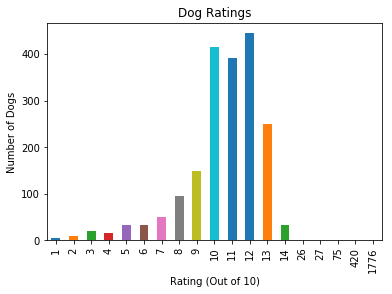

In [57]:
ax = archive_master['rating_numerator'].value_counts().sort_index().plot('bar', title = 'Dog Ratings')
ax.set_xlabel("Rating (Out of 10)")
ax.set_ylabel("Number of Dogs")

In [73]:
archive_master[archive_master['rating_numerator']==1776]['jpg_url']

793    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [74]:
archive_master[archive_master['rating_numerator']==420]['jpg_url']

1785    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

**Answer:**

The mean of dog rating is 11.70 while more than 75 dogs have rate of 10, 11 and 12 (out of 10), which means that most dogs are 'good dogs' and there are some **outstanding dogs** with rating of 420 and 1776! 

## Question II : What is the relationship between 'Favorites' and 'Retweets'?

[[ 1.          0.92954133]
 [ 0.92954133  1.        ]]


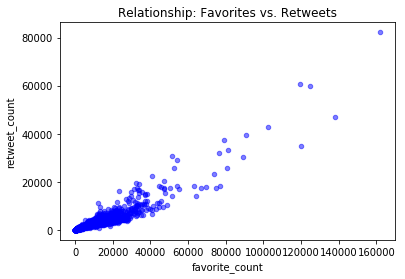

In [58]:
archive_master.plot(kind='scatter', x = 'favorite_count', y='retweet_count', color = 'b', alpha= 0.5);
corr = np.corrcoef(archive_master['favorite_count'], archive_master['retweet_count'])
plt.title('Relationship: Favorites vs. Retweets')
print(corr)

**Answer:**

The correlation between favorite_count and retweet_count is strong positive, the correlation coeffition is 0.92956. 

This means, high number of favorite counts will bring high retweets. With a quick glance at the graph, it seems like "3 counts = 1 retweet" 

## Question III : What Sources Most Popular to Use Twitter?

In [59]:
archive_master['source'].value_counts()
print(1910/(1910+28+10))

0.9804928131416838


Text(0,0.5,'Number of Tweets')

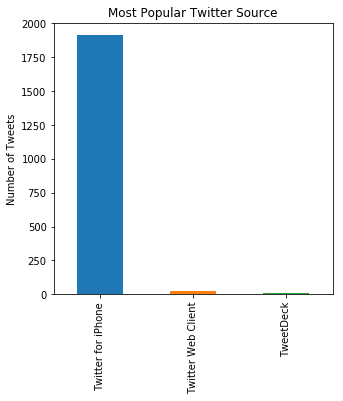

In [60]:
archive_master['source'].value_counts().plot('bar', figsize=(5,5), title='Most Popular Twitter Source').set_ylabel("Number of Tweets")

**Answer:**

It's interesting to know that more than 98% users access tweets by using their iPhones. Twitter Web Clients and TweetDeck should have more attractive functions or features to attract users.

#### <a id='reference'></a>
### References

- https://en.wikipedia.org/wiki/WeRateDogs
- https://knowyourmeme.com/memes/theyre-good-dogs-brent
- https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive
- https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
- https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- http://www.tweepy.org/
- https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
- https://github.com/siznax/wptools/wiki
- https://developer.twitter.com/en/docs/basics/developer-portal/overview
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/